# UT2 Computación Numérica: Arrays de Alto Rendimiento con NumPy

Análisis de datos con Python

# UT2: NumPy - El motor invisible del Data Science

> **Cuaderno de trabajo — UT2: NumPy**
>
> Este notebook contiene el experimento de rendimiento y los ejercicios
> de la unidad. Para la teoría completa consulta el libro (PDF).

**Experimento: comparando rendimiento**

In [2]:
import numpy as np
import time

# Datos de prueba: 1 millón de registros (simulando transacciones bancarias)
np.random.seed(42)
datos = np.random.randn(1_000_000)          # array NumPy
lista_python = datos.tolist()               # lista Python equivalente

# ── Operación 1: multiplicación simple (conversión de moneda) ─────────────────
t0 = time.perf_counter()
_ = [x * 1.08 for x in lista_python]
t_py_mult = time.perf_counter() - t0

t0 = time.perf_counter()
_ = datos * 1.08
t_np_mult = time.perf_counter() - t0

# ── Operación 2: normalización z-score (caso real de preprocesamiento) ────────
t0 = time.perf_counter()
m = sum(lista_python) / len(lista_python)
s = (sum((x - m) ** 2 for x in lista_python) / len(lista_python)) ** 0.5
_ = [(x - m) / s for x in lista_python]
t_py_norm = time.perf_counter() - t0

t0 = time.perf_counter()
_ = (datos - datos.mean()) / datos.std()
t_np_norm = time.perf_counter() - t0

print(f"{'Operación':<30} {'Python':>10} {'NumPy':>10} {'Speedup':>10}")
print("-" * 62)
print(f"{'Multiplicar x1.08':<30} {t_py_mult:>9.4f}s {t_np_mult:>9.5f}s {t_py_mult/t_np_mult:>9.1f}x")
print(f"{'Z-score (normalización)':<30} {t_py_norm:>9.4f}s {t_np_norm:>9.5f}s {t_py_norm/t_np_norm:>9.1f}x")
print(f"\nPara 1M registros, NumPy es entre {t_py_mult/t_np_mult:.0f}x y {t_py_norm/t_np_norm:.0f}x más rápido.")

Operación                          Python      NumPy    Speedup
--------------------------------------------------------------
Multiplicar x1.08                 0.0928s   0.02355s       3.9x
Z-score (normalización)           0.2903s   0.02107s      13.8x

Para 1M registros, NumPy es entre 4x y 14x más rápido.

**Análisis de los resultados:** El experimento muestra que el *speedup*
de NumPy **varía con la complejidad de la operación**. Para una
multiplicación simple, el intérprete de Python es competitivo y la
ventaja es moderada. Para la normalización z-score —que requiere
calcular media, desviación y luego recorrer los datos— el bucle de
Python procesa cada elemento individualmente mientras NumPy delega toda
la operación a código C optimizado, multiplicando la ventaja. En
proyectos reales, donde las operaciones de preprocesamiento son
complejas y los datasets tienen decenas de millones de filas, estos
factores de aceleración son la diferencia entre un *pipeline* viable y
uno que colapsa antes de llegar a producción.

<figure>
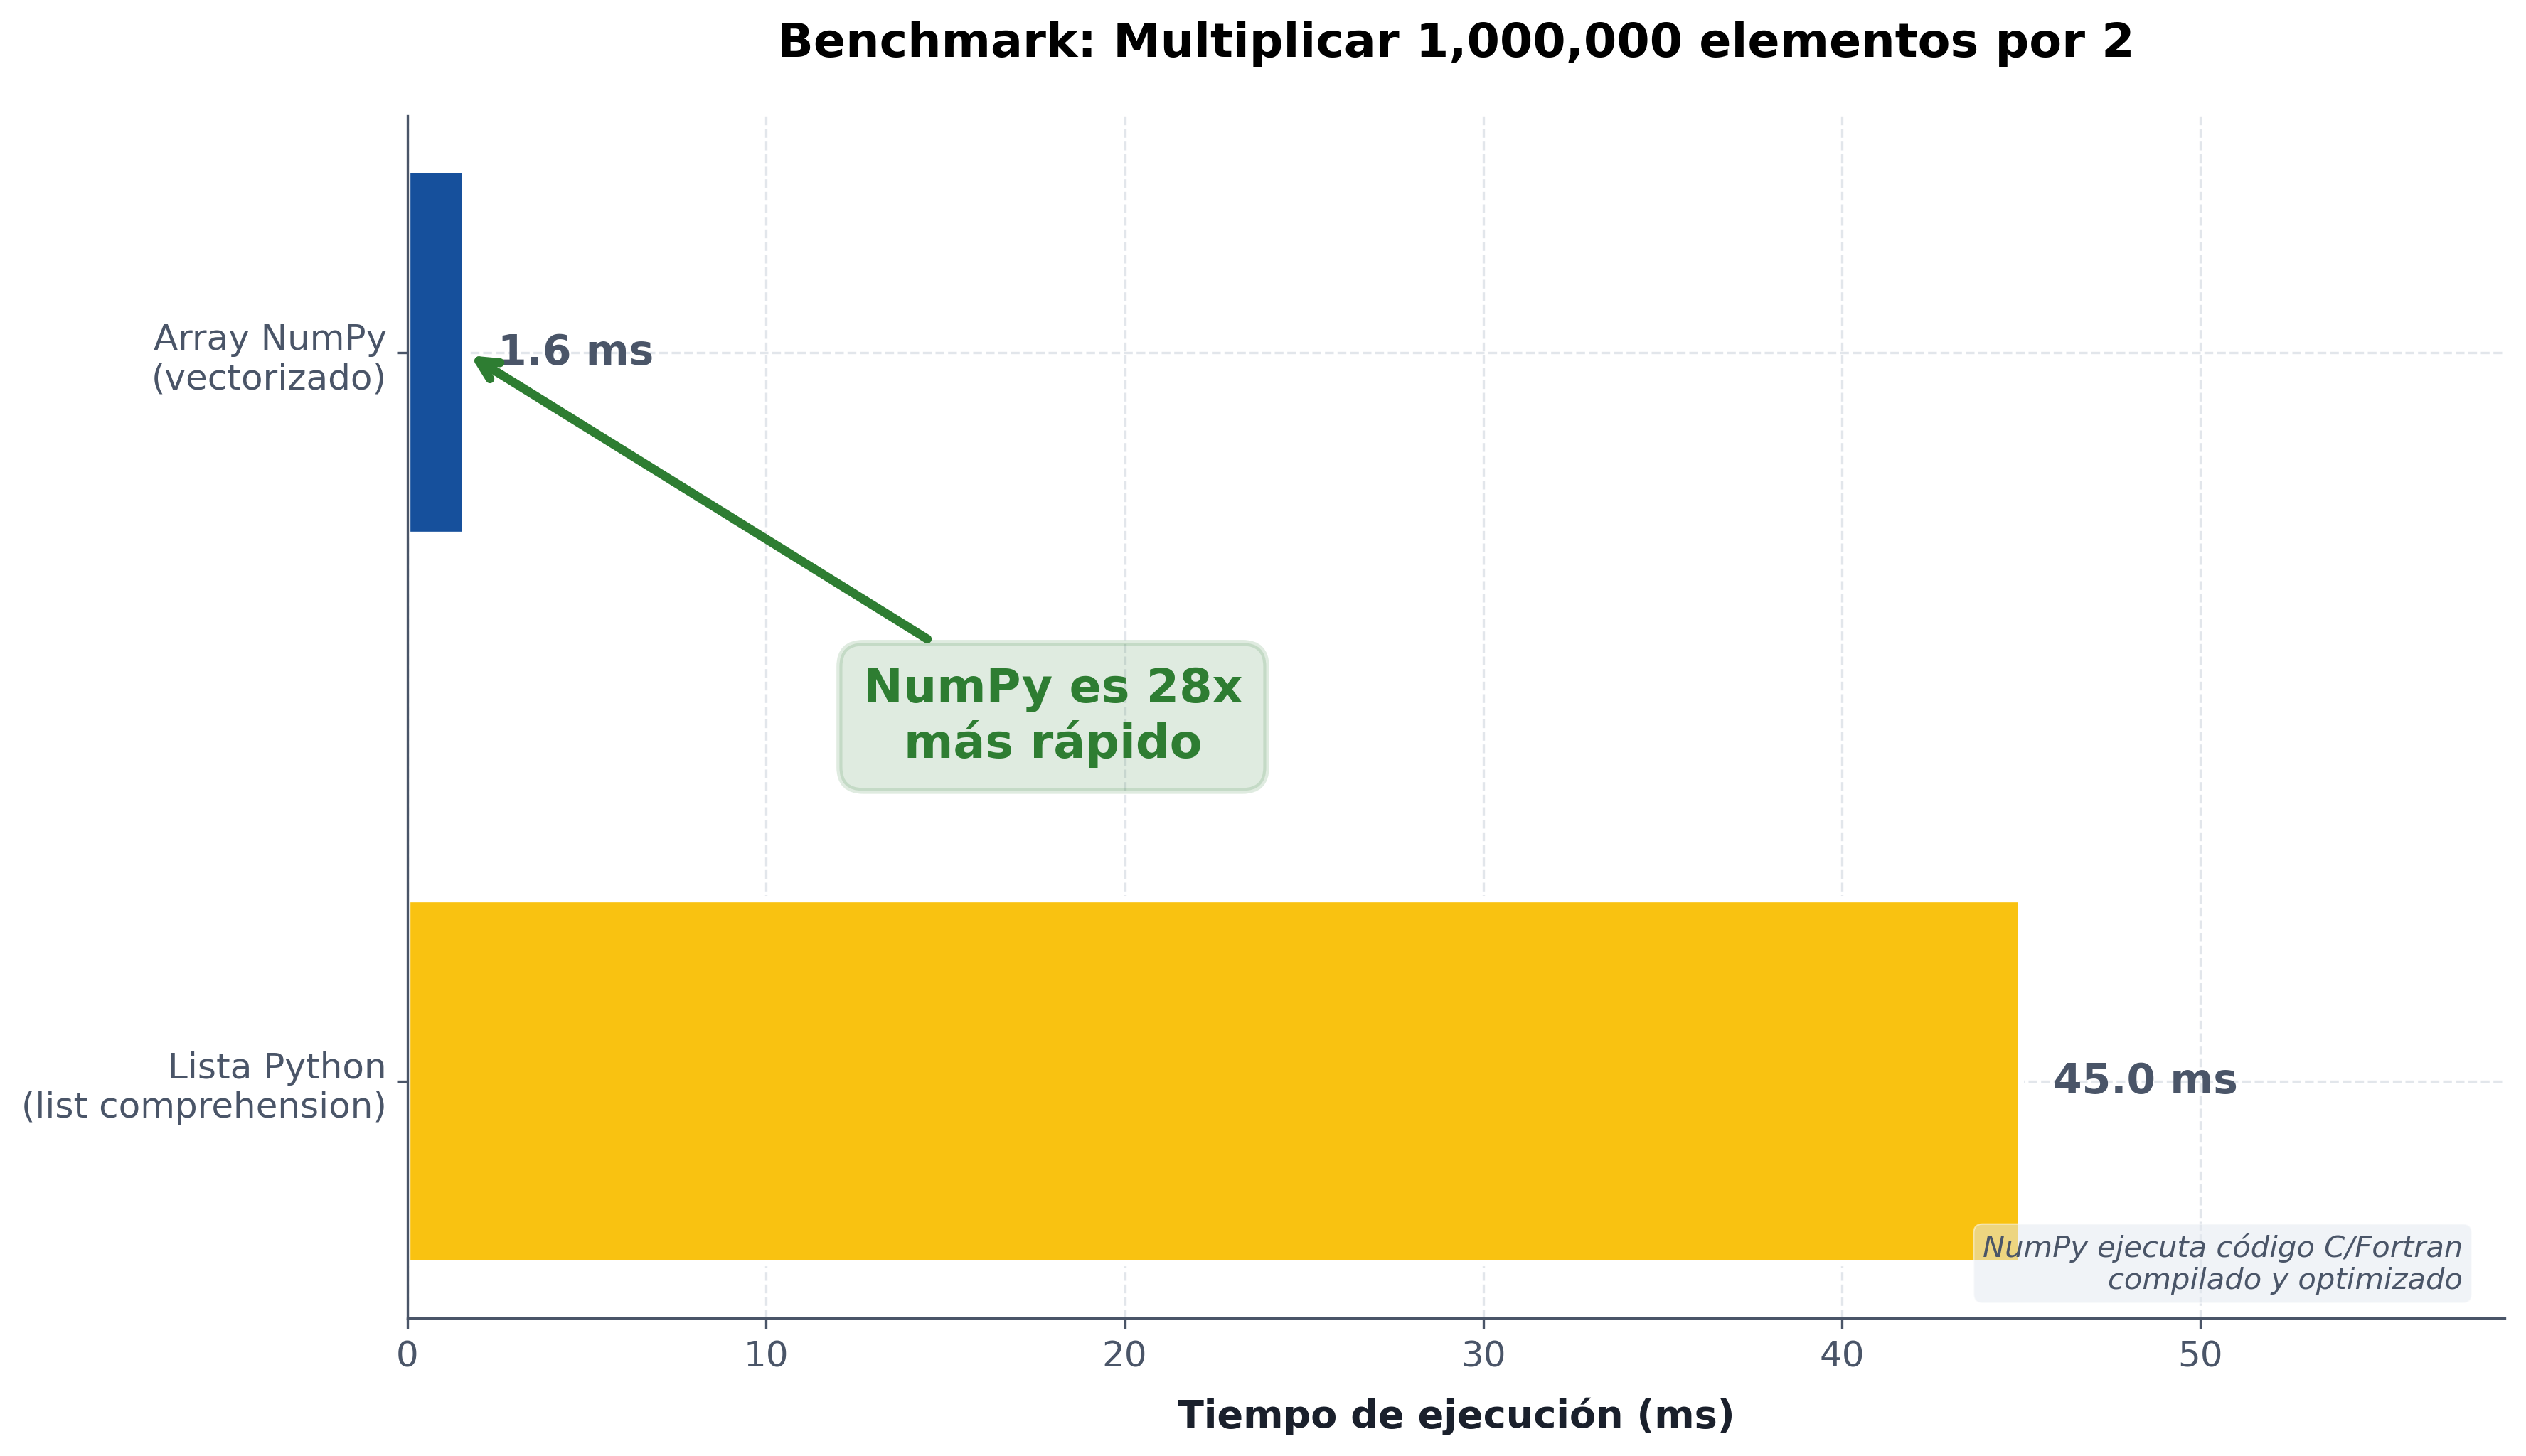
<figcaption aria-hidden="true">Benchmark de velocidad: Python
vs. NumPy</figcaption>
</figure>

**Manos a la Obra**

### Benchmark de velocidad

**Objetivo:** Demostrar empíricamente la diferencia de rendimiento entre
listas de Python y arrays de NumPy en una operación vectorizada simple.

**Contexto profesional:** Trabajas en una empresa de logística
internacional. Necesitas convertir 2 millones de distancias de
kilómetros a millas para un análisis de rutas en el mercado
estadounidense.

**Instrucciones:**

1.  Crea una lista de Python con 2 millones de números aleatorios
    (kilómetros).
2.  Convierte esos valores a millas usando un bucle o *list
    comprehension*.
3.  Crea un array de NumPy con los mismos valores.
4.  Realiza la misma conversión usando una operación vectorizada directa
    de NumPy.
5.  Mide el tiempo de ambas operaciones y calcula el factor de
    aceleración (*speedup*).

**Pistas:**

-   Factor de conversión: 1 km = 0.621371 millas.
-   Usa el módulo `time` (`time.perf_counter()`) para obtener mediciones
    precisas.

**Criterio de éxito:** El código imprime los tiempos de ambos métodos y
el *speedup* calculado. Para la conversión de distancias (operación
simple), el *speedup* típico en un portátil moderno es de 3x-10x; anota
el valor exacto que obtienes. Si es inferior a 2x, revisa que estés
usando una operación vectorizada pura en NumPy (sin bucles).

**Tiempo estimado:** 10 minutos

**Solución disponible:** El código completo para este experimento se
encuentra en el cuaderno de prácticas resueltas de la UT2.

``` python
# Escribe tu codigo aqui
```

**Manos a la Obra**

### Eficiencia de tipos de datos (*dtypes*)

**Objetivo:** Comprender cómo la elección del `dtype` impacta
drásticamente en el consumo de memoria y la capacidad de almacenamiento.

**Contexto profesional:** Estás optimizando una base de datos de
sensores IoT que almacena millones de lecturas. Cada byte ahorrado
supone gigabytes de ahorro en almacenamiento en la nube.

**Instrucciones:**

1.  Crea cuatro arrays de NumPy con 1,000,000 de elementos cada uno
    (puedes usar ceros o valores aleatorios).
2.  Usa los siguientes `dtypes`: `int8`, `int32`, `int64` y `float64`.
3.  Calcula y muestra el consumo de memoria en **Megabytes (MB)** para
    cada uno de los cuatro arrays.
4.  **Reto:** Calcula cuántos millones de registros de tipo `int8`
    podrías almacenar en el mismo espacio que ocupa un solo millón de
    registros `float64`.

**Pistas:**

-   Usa el atributo `.nbytes` para obtener el tamaño total en bytes del
    array.
-   Recuerda que $1 MB = 1024^2$ bytes (o $10^6$ para simplificar).

**Criterio de éxito:** El código debe imprimir una tabla comparativa
clara con el tamaño en MB de cada array y responder al reto de
almacenamiento.

**Tiempo estimado:** 15 minutos

``` python
# Escribe tu codigo aqui
```

**Manos a la Obra**

### Coerción de tipos

**Objetivo:** Comprender cómo NumPy maneja la coerción de tipos y las
implicaciones para integridad de datos en proyectos reales.

**Contexto profesional:** Estás construyendo un dataset para un modelo
de Machine Learning y recibes datos de múltiples fuentes con tipos
inconsistentes que necesitas consolidar.

**Instrucciones:**

1.  Crea al menos 3 arrays con tipos mixtos (ej: int + float, int +
    string, float + bool).
2.  Documenta el tipo resultante (`dtype`) en cada caso.
3.  Intenta realizar una operación matemática en un array que contenga
    strings y observa el resultado.

**Pistas:**

-   Usa `.dtype` para inspeccionar el tipo resultante.
-   Observa cómo NumPy intenta “promocionar” los datos al tipo más
    flexible disponible.

**Criterio de éxito:** El código debe demostrar claramente la jerarquía
de tipos y documentar la pérdida de funcionalidad cuando ocurre la
conversión a string.

**Tiempo estimado:** 10-15 minutos

**Solución disponible:** Revisa el cuaderno de prácticas para ver la
tabla completa de jerarquías de tipos en NumPy.

``` python
# Escribe tu codigo aqui
```

**Manos a la Obra**

### Inspección de arrays

**Objetivo:** Dominar la inspección de arrays usando los atributos
fundamentales y ser capaz de interpretar su significado en contexto de
proyectos reales.

**Contexto profesional:** Te han entregado varios arrays de un proyecto
de *computer vision* sin documentación. Antes de procesarlos, necesitas
entender su estructura para elegir las operaciones correctas.

**Instrucciones:**

1.  Crea 4 arrays diferentes representando: una serie temporal (1D), un
    dataset de clientes (2D), una imagen en escala de grises (2D) y una
    imagen RGB (3D).
2.  Para cada uno, imprime e interpreta sus atributos: `ndim`, `shape`,
    `size` y `dtype`.

**Pistas:**

-   Serie temporal: vector 1D con valores de temperatura.
-   Dataset clientes: matriz 2D (filas=clientes,
    columnas=características).
-   Imagen RGB: tensor 3D (alto × ancho × 3 canales).

**Criterio de éxito:** El código debe mostrar correctamente todos los
atributos de los 4 casos y proporcionar una interpretación textual
coherente con la realidad del dato.

**Tiempo estimado:** 15-20 minutos

**Solución disponible:** Consulta el cuaderno de prácticas para ver
ejemplos de interpretación de dimensiones en diversos dominios.

``` python
# Escribe tu codigo aqui
```

**Manos a la Obra**

### simulación Monte Carlo para estimación de pi

**Objetivo:** Dominar las funciones de creación de arrays aplicándolas a
un caso de uso real donde cada tipo de función tiene un propósito
específico en la simulación.

**Contexto profesional:** Como analista de datos, a menudo usarás
simulaciones para estimar probabilidades o valores difíciles de calcular
analíticamente. El método Monte Carlo es un estándar en finanzas, física
e ingeniería.

**Instrucciones:**

1.  Fija la semilla aleatoria con `np.random.seed(42)`.
2.  Genera 10,000 coordenadas X e Y aleatorias entre 0 y 1 usando
    `np.random.random()`.
3.  Calcula el cuadrado de la distancia al origen ($x^2 + y^2$) para
    cada punto.
4.  (Opcional) Usa `np.zeros()` para inicializar estructuras de
    resultados si planeas realizar múltiples experimentos.

**Pistas:**

-   Un dardo está dentro del círculo si $x^2 + y^2 \leq 1$.
-   La estimación de PI se obtiene mediante:
    $\pi \approx 4 \times \frac{\text{dardos dentro}}{\text{total dardos}}$.

**Criterio de éxito:** El código debe preparar todas las estructuras
necesarias y producir una estimación de PI cercana a 3.14.

**Tiempo estimado:** 25-30 minutos

**Solución disponible:** Consulta el cuaderno de prácticas para ver la
implementación vectorizada completa (sin bucles `for`).

``` python
# Escribe tu codigo aqui
```

**Preguntas de Reflexión:**

1.  **Selección de función:** Para generar puntos aleatorios en un
    cuadrado, ¿usarías `rand()`, `randn()`, o `randint()`? Justifica tu
    elección.
2.  **Reproducibilidad:** ¿Por qué es crítico fijar la semilla (`seed`)
    en una simulación? ¿Qué impacto tiene en el trabajo en equipo y en
    la auditoría de resultados?
3.  **Optimización de memoria:** Si necesitas 10 millones de puntos,
    ¿qué `dtype` elegirías para las coordenadas? Justifica considerando
    el equilibrio entre precisión y memoria.
4.  **Comparación arange vs linspace:** ¿Cuándo usarías
    `np.arange(0, 1, 0.1)` vs `np.linspace(0, 1, 10)`? ¿Cuál es más
    fiable para obtener exactamente N puntos?

**Consolidación: creación de arrays**

Has visto 4 familias de funciones de creación:

1.  **Conversión:** `np.array()` - desde estructuras Python.
2.  **Inicialización:** `zeros()`, `ones()`, `eye()`, `empty()` -
    estructuras predefinidas.
3.  **Secuencias:** `arange()`, `linspace()`, `logspace()` - rangos
    numéricos.
4.  **Aleatorios:** `rand()`, `randn()`, `randint()`, `uniform()`,
    `normal()` - datos sintéticos.

**Regla de oro:** Elige la función según el caso de uso: ¿datos
existentes? → `array()`. ¿Pre-asignar memoria? → `zeros()` o `ones()`.
¿Serie numérica? → `arange()` o `linspace()`. ¿Datos sintéticos? →
`random.*` con semilla fija.

**Conexión con RAs:** estas funciones son la base para generar datasets
sintéticos (RA4 - testing de modelos) y preparar estructuras para
almacenar resultados de análisis (RA3).

**Reflexión: elección de funciones de creación**

1.  **Reproducibilidad en ciencia:** ¿Por qué es crítico fijar la
    semilla aleatoria (`np.random.seed()`) en notebooks de investigación
    o informes? Si ejecutas el mismo código con distinta semilla,
    ¿cambian los resultados del análisis o las conclusiones? ¿Cuándo
    sería apropiado NO fijar la semilla?

2.  **Eficiencia de memoria:** tienes que generar 100 millones de
    números aleatorios. ¿Qué `dtype` elegirías entre `float16`,
    `float32` y `float64`? Calcula cuánta RAM consume cada opción. ¿Qué
    precisión pierdes con cada elección?

## Indexación y *slicing*: acceder a tus datos

Con la caja de herramientas de creación dominada, el siguiente paso es
aprender a acceder quirúrgicamente a los datos que necesitas.

En ciencia de datos, **seleccionar subconjuntos de datos** es una
operación que harás miles de veces: filtrar clientes activos, extraer
una columna de características, seleccionar filas de entrenamiento
vs. validación, etc. NumPy ofrece múltiples técnicas, cada una
optimizada para casos de uso diferentes. Dominar indexación es
prerrequisito para RA1 (manejo de datos) y RA2 (limpieza y filtrado).

<figure>
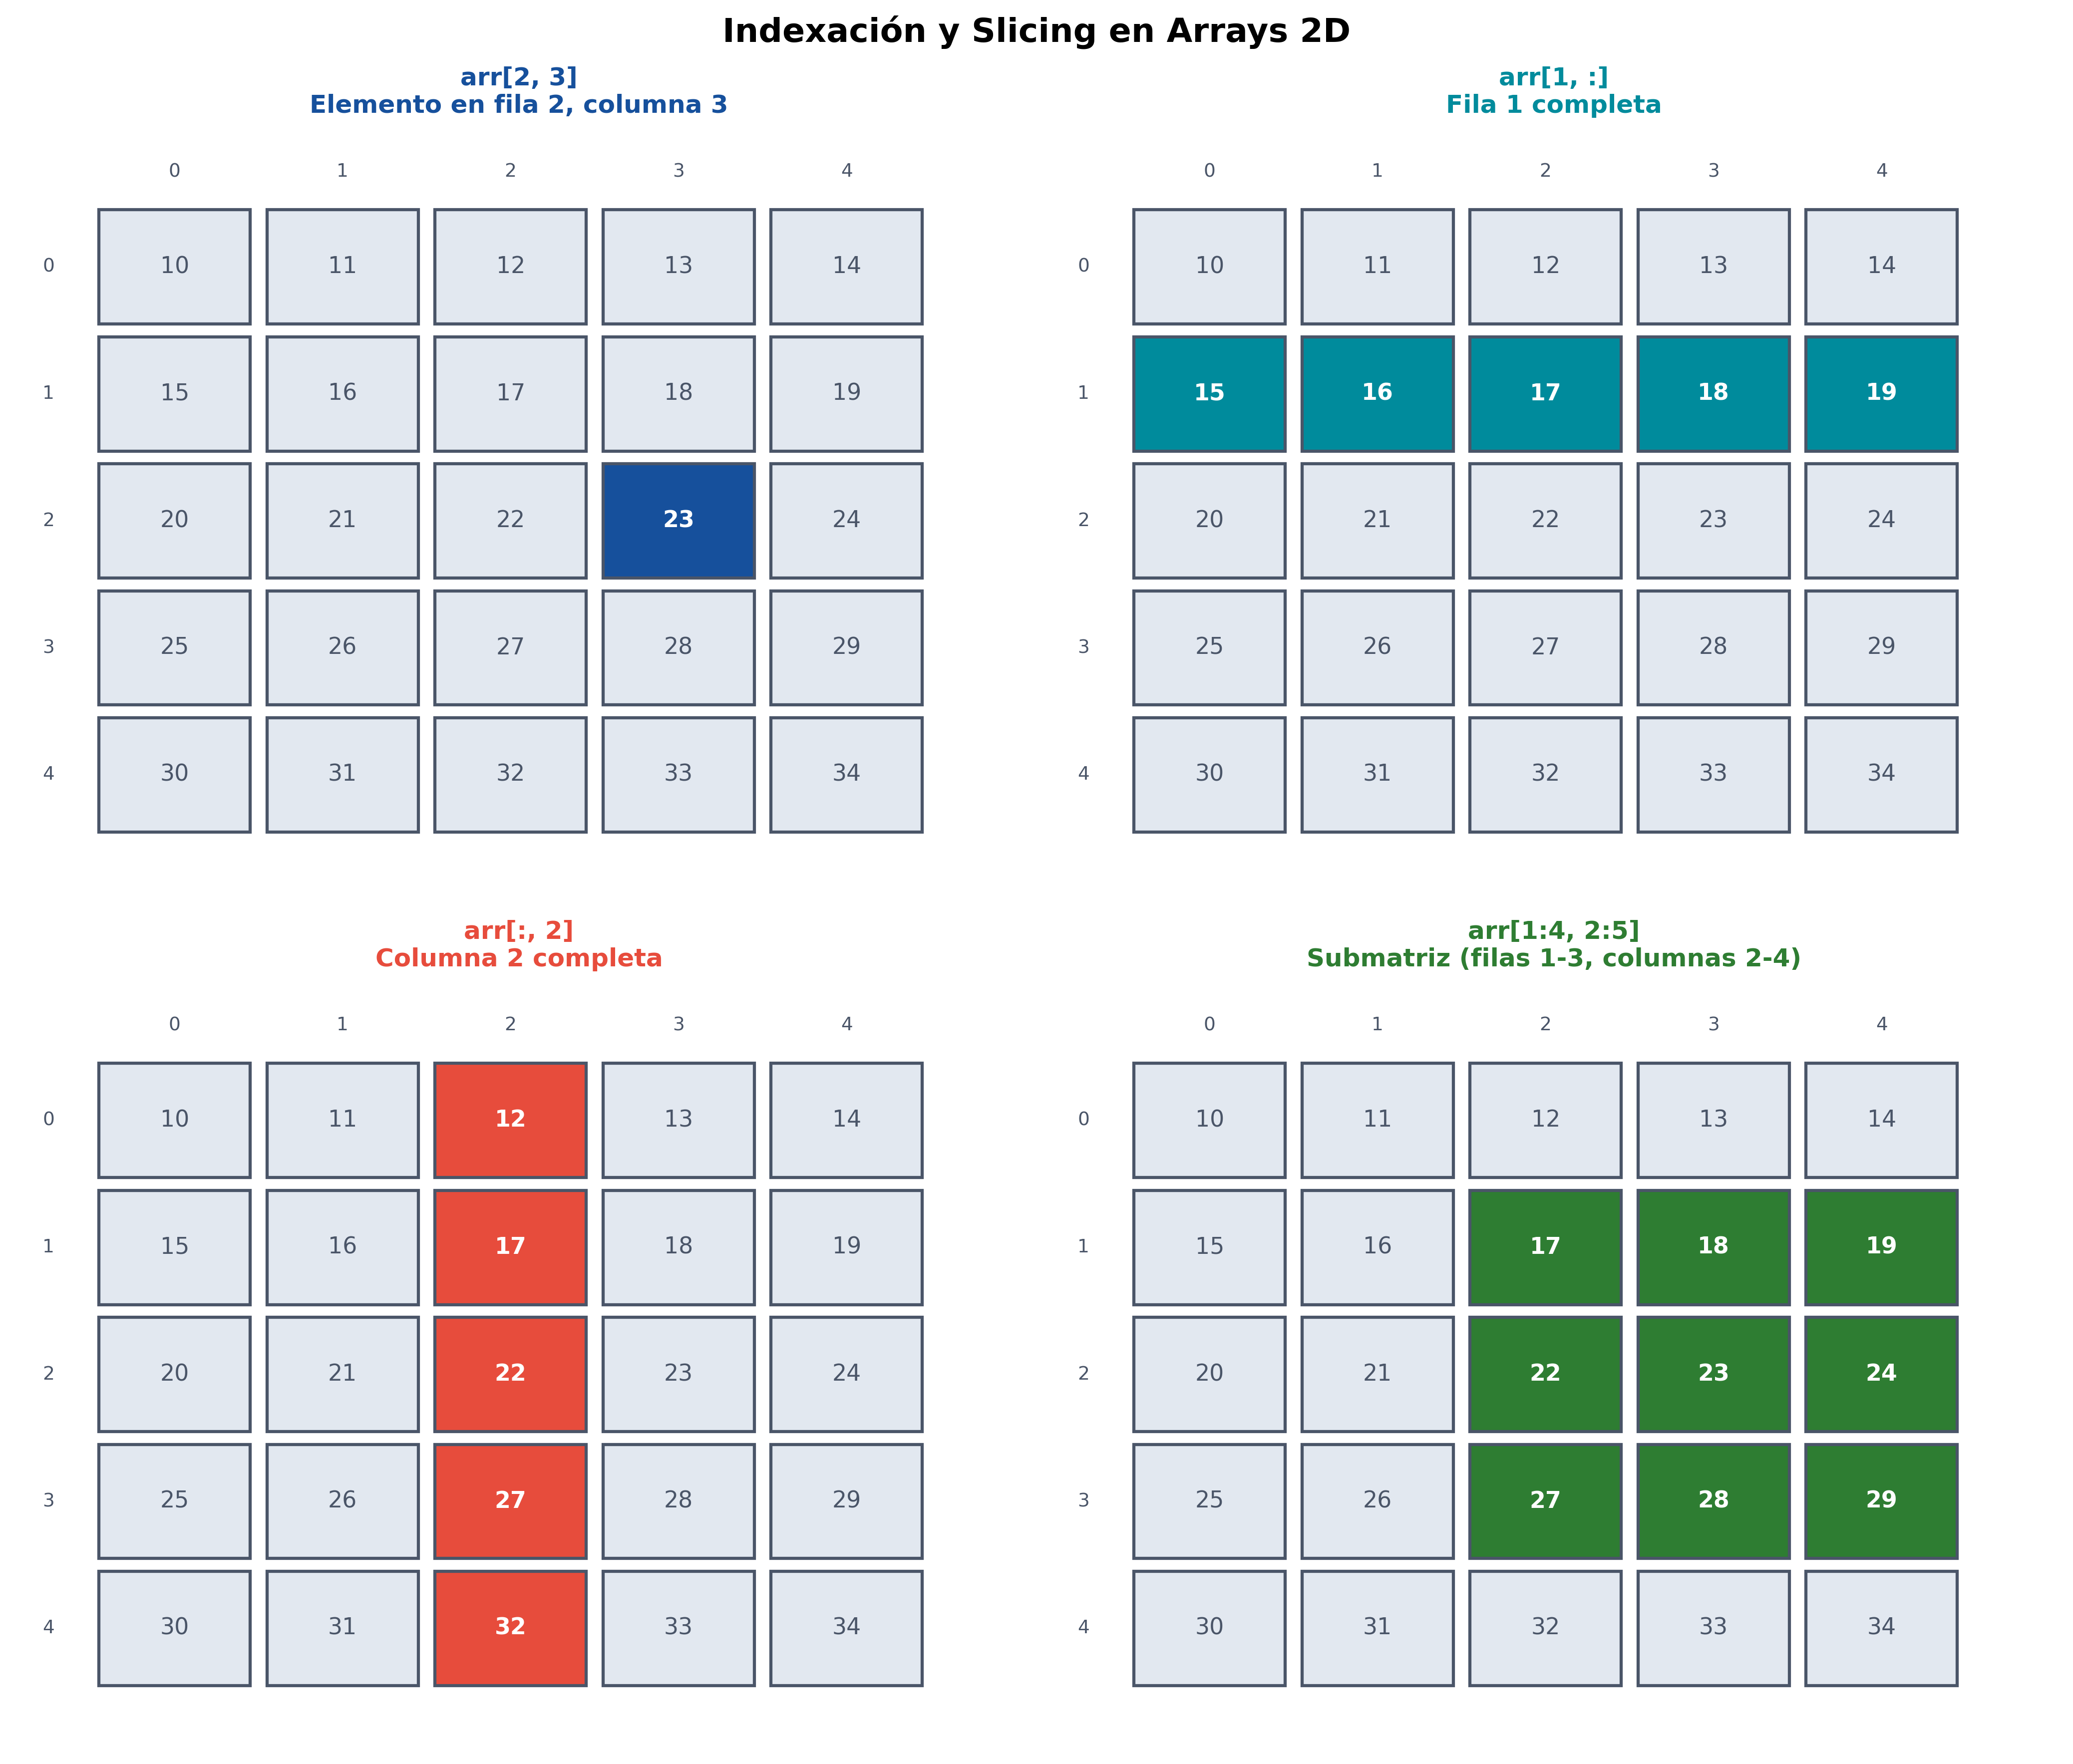
<figcaption aria-hidden="true">Técnicas de indexación y <em>slicing</em>
en NumPy</figcaption>
</figure>

### Indexación básica (1D)

La sintaxis de indexación en NumPy es idéntica a la de listas de Python:
el índice `0` apunta al primer elemento y los índices negativos cuentan
desde el final. El *slicing* sigue la convención `inicio:fin:paso`,
donde `fin` es **exclusivo** — exactamente igual que `range()`:

In [14]:
arr = np.array([10, 20, 30, 40, 50])

# Acceso por posición (igual que listas de Python)
print(arr[0])       # 10 (primer elemento)
print(arr[-1])      # 50 (último elemento)
print(arr[2])       # 30 (tercer elemento)

# Slicing: inicio:fin:paso (fin exclusivo)
print(arr[1:4])     # [20 30 40] (índices 1, 2, 3)
print(arr[:3])      # [10 20 30] (desde inicio hasta índice 2)
print(arr[2:])      # [30 40 50] (desde índice 2 hasta el final)
print(arr[::2])     # [10 30 50] (cada 2 elementos)
print(arr[::-1])    # [50 40 30 20 10] (invertir array)

`arr[::-1]` (invertir) es común para series temporales cuando necesitas
ordenar de más reciente a más antiguo.

### Indexación Multidimensional (2D)

Para matrices (datasets tabulares), usamos `[fila, columna]`:

In [15]:
matriz = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

# Elemento específico
print(matriz[0, 0])      # 1 (fila 0, columna 0)
print(matriz[2, 1])      # 8 (fila 2, columna 1)

# Fila completa
print(matriz[1])         # [4 5 6] (fila 1 completa)
print(matriz[1, :])      # [4 5 6] (equivalente explícito)

# Columna completa
print(matriz[:, 0])      # [1 4 7] (columna 0 completa)
print(matriz[:, -1])     # [3 6 9] (última columna)

# Submatriz (slicing en ambas dimensiones)
print(matriz[0:2, 1:3])  # [[2 3]
                         #  [5 6]]

Los slices en NumPy son **vistas**, no copias. Modificar un slice
modifica el array original. Si necesitas independencia, usa `.copy()`:

``` python
vista = matriz[0:2, :]       # VISTA (comparte memoria)
copia = matriz[0:2, :].copy()  # COPIA (independiente)

vista[0, 0] = 999
print(matriz[0, 0])  # ¡999! Modificamos el original sin querer

copia[0, 0] = 888
print(matriz[0, 0])  # Sigue siendo 999 (copia es independiente)
```

Este es el **error silencioso número 1** en NumPy. En producción, puede
corromper datos sin que te des cuenta.

### Máscaras booleanas: el superpoder de la ciencia de datos

Las máscaras son **la técnica más importante** que aprenderás. Permiten
filtrar datos basándote en condiciones lógicas. El mecanismo funciona en
dos pasos: primero se crea un array de `True`/`False` comparando cada
elemento con la condición, y luego ese array se usa como índice para
seleccionar solo los elementos que cumplen la condición. Veamos esto en
acción:

In [17]:
datos = np.array([15, 23, 8, 42, 16, 31, 7])

# Crear máscara (array de True/False)
mascara = datos > 20
print("Máscara (datos > 20):", mascara)
# [False  True False  True False  True False]

# Aplicar máscara (filtrar elementos que cumplen condición)
filtrados = datos[mascara]
print("Elementos > 20:", filtrados)
# [23 42 31]

# Forma compacta (más común)
print("Directo:", datos[datos > 20])

Para combinar varias condiciones, NumPy usa `&` (AND), `|` (OR) y `~`
(NOT) — los operadores booleanos que actúan elemento a elemento sobre
arrays. Es obligatorio usar **paréntesis** alrededor de cada condición
para controlar la precedencia:

In [18]:
datos = np.array([5, 15, 25, 35, 45])

# AND: ambas condiciones
rango = datos[(datos > 10) & (datos < 40)]
print("Entre 10 y 40:", rango)  # [15 25 35]

# OR: al menos una condición
extremos = datos[(datos < 15) | (datos > 40)]
print("Menores que 15 O mayores que 40:", extremos)  # [5 45]

# NOT: negación
no_extremos = datos[~((datos < 15) | (datos > 40))]
print("NO extremos:", no_extremos)  # [15 25 35]

Usa `&` (and), `|` (or), `~` (not) en NumPy, **NO** `and`, `or`, `not`
de Python. Los operadores de Python no funcionan con arrays y producen
errores confusos.

Las máscaras son la base del 80% de las operaciones de limpieza de
datos. En Pandas (UT3), usarás exactamente la misma sintaxis:
`df[df['columna'] > threshold]`. Dominar máscaras booleanas aquí te dará
una ventaja enorme en las UTs posteriores.

### Fancy indexing: selección por índices

Esta técnica permite seleccionar elementos en posiciones específicas no
consecutivas pasando una lista o un array de enteros como índice. Es
fundamental para tareas como el *train/test split* o el remuestreo de
datos.

**Sintaxis:** Puedes ver ejemplos detallados de *fancy indexing* en 1D y
2D en la sección final de referencia.

**Manos a la Obra**

### indexación y filtrado

**Objetivo:** Dominar las 4 técnicas de indexación (básica, *slicing*,
booleana y *fancy*) aplicadas a un caso de uso real de análisis de
negocio.

**Contexto profesional:** Tienes datos de ventas diarias de una tienda
e-commerce (en miles de €) para un mes. Necesitas extraer insights y
preparar subconjuntos para el departamento de marketing.

**Instrucciones:**

1.  Crea un array de 30 valores que represente las ventas diarias de un
    mes.
2.  Extrae los días con ventas por encima del percentil 90.
3.  Selecciona solo los fines de semana (pista: usa slicing con paso 7).
4.  Filtra los días con ventas entre 10k€ y 20k€ usando operadores
    lógicos (`&`).
5.  Extrae una muestra específica de días (ej: días 1, 5, 10, 20) usando
    *fancy indexing*.

**Pistas:**

-   Los operadores lógicos en NumPy son `&` (AND), `|` (OR), `~` (NOT).
-   Recuerda que el slicing crea vistas, mientras que la indexación
    booleana y fancy crean copias.

**Criterio de éxito:** El código debe extraer correctamente los 5
subconjuntos solicitados y demostrar el uso de las diferentes técnicas
de indexación.

**Tiempo estimado:** 20-25 minutos

**Solución disponible:** Consulta el cuaderno de prácticas para ver cómo
automatizar el filtrado de fines de semana de forma robusta.

``` python
# Escribe tu codigo aqui
```

## Operaciones matemáticas: vectorización en acción

Ahora que sabes crear arrays y seleccionar subconjuntos, llega el
verdadero poder de NumPy: operar sobre millones de elementos sin
escribir un solo loop.

La vectorización es el paradigma fundamental de NumPy y el que marca la
transición mental desde “programador Python” a “científico de datos”. En
lugar de escribir loops explícitos para procesar cada elemento, aplicas
operaciones a arrays completos en una línea. Un pipeline de datos que
procesa transacciones con loops puede tardar horas. El mismo pipeline
vectorizado: minutos. Esta diferencia determina si tu sistema puede
operar en tiempo real o no.

### Operaciones *element-wise* (elemento a elemento)

Cuando aplicas un operador aritmético (`+`, `-`, `*`, `/`, `**`) entre
un array y un escalar, NumPy aplica la operación a **cada elemento
individualmente** — sin bucles explícitos. Lo mismo ocurre entre dos
arrays del mismo *shape*: el elemento en la posición `i` del primero se
opera con el elemento en la posición `i` del segundo:

In [20]:
arr = np.array([1, 2, 3, 4, 5])

# Operaciones aritméticas con escalares (broadcasting implícito)
print("arr + 10:", arr + 10)
print("arr * 2:", arr * 2)
print("arr ** 2:", arr ** 2)
print("arr / 2:", arr / 2)

# Operaciones entre arrays del mismo shape
arr1 = np.array([1, 2, 3])
arr2 = np.array([10, 20, 30])

print("arr1 + arr2:", arr1 + arr2)
print("arr1 * arr2:", arr1 * arr2)

En NumPy, `*` es multiplicación *element-wise*, **NO** producto
matricial. Para producto matricial usa `@` o `np.dot()`. Además, para
que operaciones entre arrays funcionen, sus *shapes* deben ser
compatibles (mismas dimensiones o *broadcasting* válido). *Shapes*
incompatibles lanzan `ValueError`.

### Funciones universales (ufuncs)

NumPy proporciona funciones matemáticas optimizadas que operan
*element-wise* sobre arrays completos, implementadas en C para máxima
velocidad. Las más usadas en ciencia de datos son:

| Categoría               | Funciones                               | Aplicación habitual en DS                          |
|:---------------|:---------------|:----------------------------------------|
| Raíces / potencias      | `np.sqrt()`, `np.power()`               | Distancias euclídeas, RMSE                         |
| Logaritmo / exponencial | `np.log()`, `np.log2()`, `np.exp()`     | Normalizar distribuciones sesgadas, entropía       |
| Trigonométricas         | `np.sin()`, `np.cos()`, `np.tan()`      | Señales periódicas, series temporales estacionales |
| Redondeo                | `np.floor()`, `np.ceil()`, `np.round()` | Discretización, preprocesamiento de precios        |

Categorías de funciones universales (*ufuncs*) en NumPy

In [21]:
arr = np.array([1, 4, 9, 16, 25])

# Raíz cuadrada
print("Raíz cuadrada:", np.sqrt(arr))

# Exponencial y logaritmo
print("exp:", np.exp(np.array([0, 1, 2])))
print("log natural:", np.log(arr))

# Trigonométricas
angulos = np.array([0, np.pi/2, np.pi])
print("seno:", np.sin(angulos))

# Redondeo
decimales = np.array([1.23, 4.56, 7.89])
print("floor:", np.floor(decimales))
print("ceil:", np.ceil(decimales))
print("round:", np.round(decimales))

**Relevancia DS:** transformaciones logarítmicas (`np.log()`) son
comunes para normalizar distribuciones sesgadas antes de aplicar ML. La
raíz cuadrada (`np.sqrt()`) aparece constantemente en cálculo de
distancias y desviaciones estándar.

### Agregaciones: del array a un escalar

Las funciones de agregación son el núcleo del análisis exploratorio
(RA3): reducen un array entero a un único valor resumen. Todas aceptan
el parámetro `axis` para operar por filas o columnas en arrays 2D:

| Función                       | Qué calcula                    | Equivalente de método     |
|:-------------|:--------------------|:-------------------------------------|
| `np.sum(arr)`                 | Suma de todos los elementos    | `arr.sum()`               |
| `np.mean(arr)`                | Media aritmética               | `arr.mean()`              |
| `np.median(arr)`              | Mediana (robusta a *outliers*) | —                         |
| `np.std(arr)`                 | Desviación estándar            | `arr.std()`               |
| `np.var(arr)`                 | Varianza                       | `arr.var()`               |
| `np.min(arr)` / `np.max(arr)` | Mínimo / máximo                | `arr.min()` / `arr.max()` |
| `np.percentile(arr, q)`       | Percentil $q$ (0–100)          | —                         |

Funciones de agregación estadística en NumPy

In [22]:
datos = np.array([23, 45, 12, 67, 34, 89, 21])

# Estadísticas básicas
print("Suma:", np.sum(datos))
print("Media:", np.mean(datos))
print("Mediana:", np.median(datos))
print("Desv. Std:", np.std(datos))
print("Varianza:", np.var(datos))

# Extremos
print("Mínimo:", np.min(datos))
print("Máximo:", np.max(datos))
print("Rango:", np.max(datos) - np.min(datos))

# Percentiles
print("Percentil 25:", np.percentile(datos, 25))
print("Percentil 75:", np.percentile(datos, 75))

En ciencia de datos, los percentiles son más robustos que media/std para
detectar outliers (valores atípicos). La regla común: los outliers son
valores fuera de $[Q_1 - 1.5 \cdot IQR, Q_3 + 1.5 \cdot IQR]$, donde
$IQR = Q_3 - Q_1$. Dominarás esta técnica en profundidad en la UT5
(Pre-procesamiento).

**El concepto crítico: axis (eje de agregación)**

Para arrays multidimensionales, `axis` controla **en qué dirección**
agregas:

``` python
matriz = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

# Sin axis: opera sobre TODO el array (flatten implícito)
print("Suma total:", np.sum(matriz))

# axis=0: opera "hacia abajo" (colapsa filas, resultado = columnas)
print("Suma por columna:", np.sum(matriz, axis=0))

# axis=1: opera "hacia la derecha" (colapsa columnas, resultado = filas)
print("Suma por fila:", np.sum(matriz, axis=1))
```

**Mnemotécnica visual:**

    axis=0 → ↓ (colapsa verticalmente)
    axis=1 → → (colapsa horizontalmente)

**Regla práctica** (para recordar rápido):

-   `axis=0` → resultado en forma de c**0**lumnas.
-   `axis=1` → resultado en forma de f**1**las.

**Interpretación formal** (para entender a fondo):

-   `axis=0` → opera **a lo largo** del eje 0 (filas) → las colapsa.
-   `axis=1` → opera **a lo largo** del eje 1 (columnas) → las colapsa.

**Relevancia crítica para ML:** en un dataset con *shape* `(1000, 50)`
(1000 clientes, 50 características):

-   `np.mean(X, axis=0)` → Media de cada *feature* (50 valores) - para
    normalización.
-   `np.mean(X, axis=1)` → Media de cada cliente (1000 valores) - para
    análisis por observación.

Confundir `axis=0` con `axis=1` es el error número 2 más común en NumPy
(después del tema de vistas). Practica hasta que sea intuitivo.

**Manos a la Obra**

### operaciones y agregaciones

**Objetivo:** Aplicar operaciones vectorizadas y agregaciones con el uso
correcto del parámetro `axis` para extraer *insights* de negocio.

**Contexto profesional:** Eres analista de una cadena de supermercados.
Tienes una matriz con ventas diarias (filas=tiendas, columnas=días de la
semana) de 10 tiendas durante una semana.

**Instrucciones:**

1.  Crea una matriz de 10×7 con ventas simuladas.
2.  Calcula las ventas totales por tienda (suma horizontal).
3.  Calcula la media de ventas diaria para toda la cadena (suma
    vertical).
4.  Encuentra qué tienda tuvo el mejor rendimiento total (`.argmax()`).
5.  Normaliza las ventas de cada tienda (resta su media y divide por su
    desviación estándar).

**Pistas:**

-   `axis=0` opera a lo largo de las filas (hacia abajo, por columna) y
    `axis=1` a lo largo de las columnas (hacia la derecha, por fila).
-   Usa `keepdims=True` para facilitar el broadcasting al normalizar.

**Criterio de éxito:** El código debe calcular correctamente las
métricas por eje y demostrar una transformación de normalización
exitosa.

**Tiempo estimado:** 20-25 minutos

**Solución disponible:** Revisa el cuaderno de prácticas para ver la
comparativa de rendimiento entre loops y agregaciones NumPy.

``` python
# Escribe tu codigo aqui
```

## Broadcasting: Magia de Shapes Compatibles

Las operaciones vectorizadas funcionan directamente entre arrays del
mismo shape. Pero ¿qué pasa cuando las dimensiones no coinciden? Aquí es
donde entra broadcasting, uno de los mecanismos más elegantes de NumPy.

Broadcasting es el mecanismo que permite que NumPy opere entre arrays de
shapes diferentes **sin copiar datos explícitamente**. Es la
optimización que hace posible procesar datasets gigantes en RAM
limitada. Sin broadcasting, tendrías que crear copias explícitas de
arrays para igualar shapes → consumo de memoria insostenible. Con
broadcasting, NumPy “estira” conceptualmente los arrays más pequeños →
eficiente en memoria. Broadcasting es lo que te permite normalizar un
dataset de 1M de filas × 100 columnas restando la media y dividiendo por
std **sin crear arrays temporales gigantes**.

<figure>
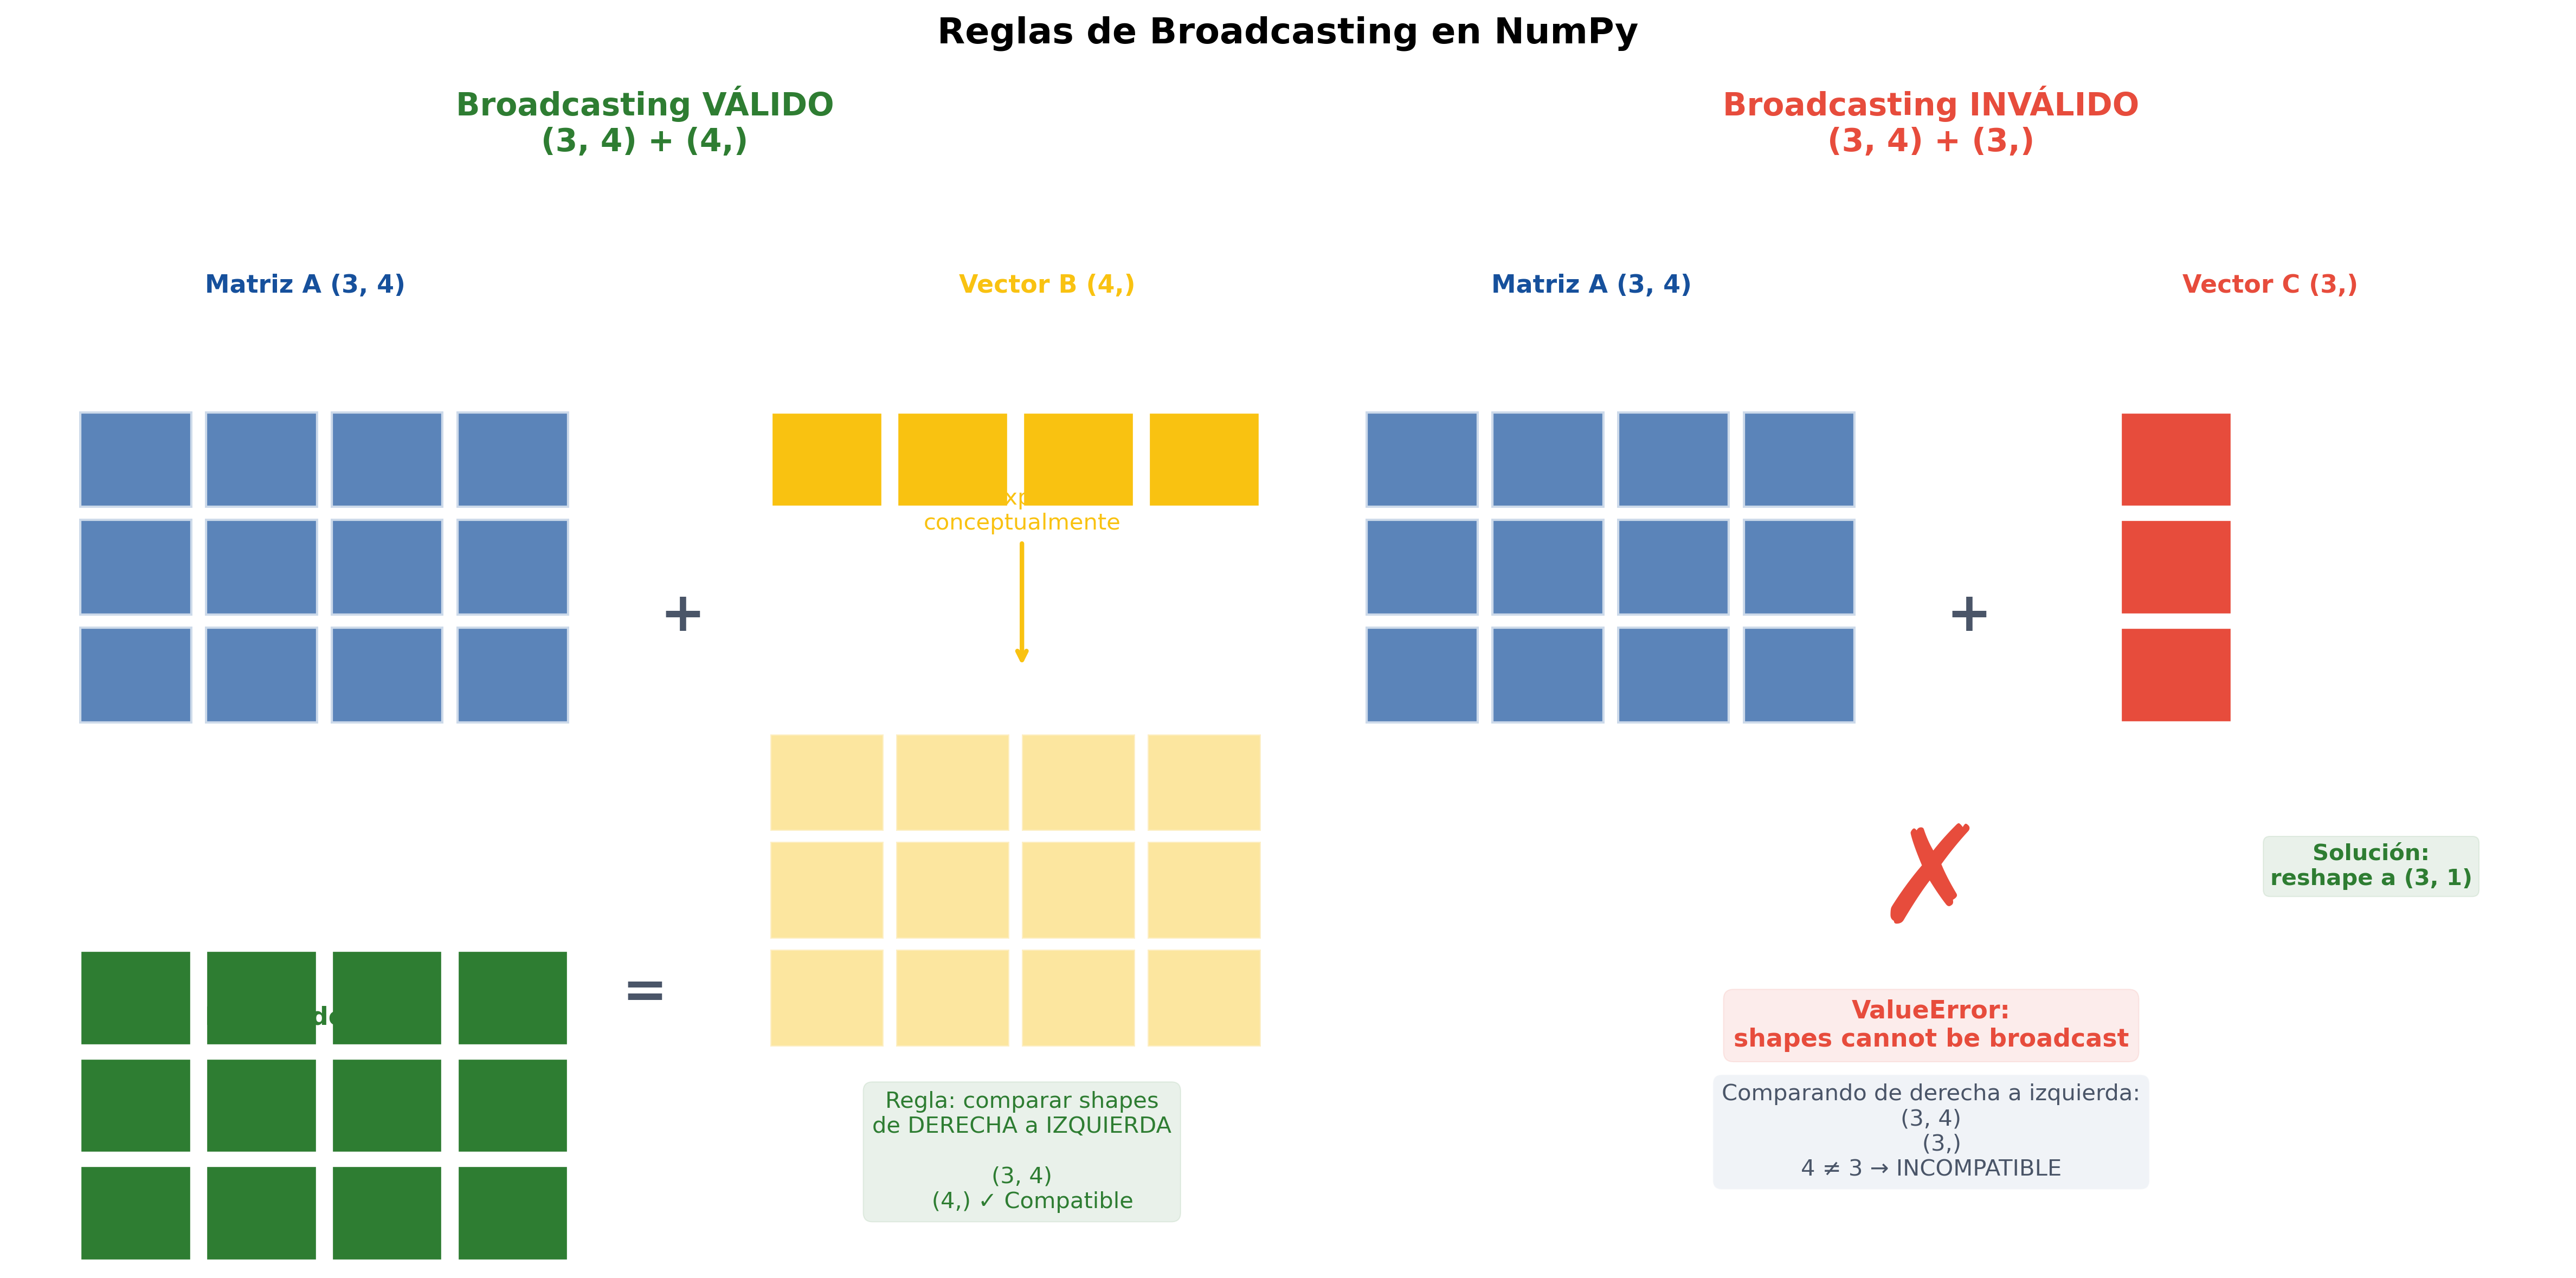
<figcaption aria-hidden="true">Mecanismo de Broadcasting en
NumPy</figcaption>
</figure>

### Reglas de Broadcasting

NumPy compara shapes de derecha a izquierda. Dos dimensiones son
compatibles si:

1.  Son iguales, O
2.  Una de ellas es 1

In [25]:
# Caso 1: Escalar + Array (broadcasting trivial)
arr = np.array([1, 2, 3, 4])
print(arr + 10)  # [11 12 13 14]
# Shape: (4,) + () → broadcasting válido

# Caso 2: Vector + Matriz (broadcasting útil)
matriz_a = np.array([[1, 2, 3],
                   [4, 5, 6]])
vector = np.array([10, 20, 30])

resultado = matriz_a + vector
print(resultado)
# [[11 22 33]
#  [14 25 36]]
# Shape: (2, 3) + (3,) → se "estira" vector a (2, 3) conceptualmente

# Caso 3: Broadcasting en 2D
matriz_b = np.ones((3, 4))
columna = np.array([[10], [20], [30]])  # Shape (3, 1)

resultado = matriz_b + columna
print(resultado)
# Shape: (3, 4) + (3, 1) → se "estira" columna a (3, 4)

**Visualización mental:**

    (3, 4) + (3, 1)
        ↓        ↓
    (3, 4) + (3, 4)  ← la (3,1) se "estira" replicándose 4 veces

Shapes incompatibles causan
`ValueError: operands could not be broadcast together`. Ejemplo:
`(3, 4) + (2,)` es incompatible. Cuando veas este error, imprime los
`.shape` de ambos operandos y compáralos de derecha a izquierda.

### Aplicación: normalización de dataset por *z-score*

**¿Qué es el *z-score*?**

El ***z-score*** (o puntuación estándar) es una técnica de
transformación que reescala los datos para que tengan una **media de 0**
($\mu = 0$) y una **desviación estándar de 1** ($\sigma = 1$). En la UT5
(Pre-procesamiento) estudiarás esta técnica con mayor profundidad,
comparándola con otras estrategias de normalización.

Esto nos permite comparar datos que originalmente estaban en escalas muy
diferentes (por ejemplo, comparar “salario en euros” con “años de
experiencia”).

**Fórmula matemática:**

$$
z = \frac{x - \mu}{\sigma}
$$

**Donde:**

-   $x$: es el valor individual que queremos transformar.
-   $\mu$ (mu): es la **media** (promedio) del conjunto de datos.
-   $\sigma$ (sigma): es la **desviación estándar** (cuánto varían los
    datos).

**¿Por qué es importante?** Imagina que entrenas un modelo de ML para
predecir el salario de empleados usando: Edad (rango 22-65), Experiencia
(rango 0-40) y Salario actual (rango 18,000-120,000 €). Sin
normalización, el algoritmo dará **mucho más peso** al salario (números
grandes) que a la edad (números pequeños), aunque ambas variables puedan
ser igual de importantes. El ***z-score*** pone **todas las variables en
la misma escala** para que el modelo las trate equitativamente.

**Interpretación práctica del *z-score*:**

| Valor de $z$ | Significado                                     |
|:-------------|:------------------------------------------------|
| $z = 0$      | El valor es exactamente igual a la media.       |
| $z > 0$      | El valor está **por encima** de la media.       |
| $z < 0$      | El valor está **por debajo** de la media.       |
| $|z| > 3$    | El valor es inusualmente extremo (**outlier**). |

Interpretación de los valores de *z-score*

**Ejemplo concreto:**

    Salarios: [25000, 28000, 30000, 32000, 85000]
             ↓ Aplicar z-score
    Z-scores: [-0.71, -0.49, -0.28, -0.06, 1.54]
                                             ↑
                                        ¡Outlier claro!

**¿Cuándo usar *z-score* vs. otras normalizaciones?**

| Método            | Cuándo usar                                                | Ventaja                             |
|------------|-------------------------------------|-----------------------|
| ***z-score***     | Cuando datos siguen distribución normal (campana de Gauss) | Preserva outliers como información  |
| **Min-Max** (0-1) | Cuando necesitas rango específico \[0,1\]                  | Útil para redes neuronales          |
| **Robust Scaler** | Cuando hay muchos outliers                                 | Usa mediana/IQR en vez de media/std |

Comparativa de métodos de normalización y escalado de datos

Scikit-learn (UT8) tiene `StandardScaler` que hace esto automáticamente,
pero entender la implementación con NumPy es esencial para depuración y
casos especiales. Cuando llegues a la UT8, reconocerás que
`StandardScaler().fit_transform(X)` hace exactamente lo mismo que
`(X - np.mean(X, axis=0)) / np.std(X, axis=0)`.

**Caso de uso más común en Data Science:**

**Preprocessing para Machine Learning:** El 90% de algoritmos de ML
(regresión lineal, SVM, redes neuronales, KNN) **requieren o mejoran
significativamente** con features normalizadas.

In [26]:
# Implementación vectorizada con NumPy (lo veremos en la práctica)
z_scores = (datos - np.mean(datos, axis=0)) / np.std(datos, axis=0)

Vamos con la práctica:

In [27]:
# Dataset: 1000 observaciones, 5 características
X = np.random.randn(1000, 5) * 10 + 50

# Normalización Z-score: (X - mu) / dev por feature
media = np.mean(X, axis=0)  # Shape (5,) - media de cada columna
std = np.std(X, axis=0)     # Shape (5,) - std de cada columna

# Broadcasting automático
X_normalizado = (X - media) / std
# Shape: (1000, 5) - (5,) / (5,) → funciona por broadcasting

print("Shape original:", X.shape)
print("Shape media:", media.shape)
print("Shape normalizado:", X_normalizado.shape)

# Verificar: media ~ 0, std ~ 1
print("Nueva media por feature:", np.mean(X_normalizado, axis=0))
print("Nueva std por feature:", np.std(X_normalizado, axis=0))

**Análisis de los resultados:** La salida confirma que has «centrado»
los datos: ahora todas tus variables tienen una media de 0 y una
varianza de 1, independientemente de sus unidades originales. Este paso
es el «estándar de oro» antes de alimentar algoritmos como Regresión
Logística o Redes Neuronales, asegurando que ninguna variable domine el
modelo simplemente por tener números más grandes (como el salario frente
a la edad).

**Aprendizaje guiado:** En la sección final de “Ejemplos de referencia”,
dispones de un recorrido paso a paso que desglosa cómo se comportan las
dimensiones en operaciones de *broadcasting* fila a fila y columna a
columna.

**Manos a la Obra**

### *broadcasting* aplicado

**Objetivo:** Dominar ***broadcasting*** aplicándolo a transformaciones
realistas de datos sin crear arrays temporales innecesarios.

**Contexto profesional:** Tienes un dataset de calificaciones de
estudiantes (matriz 20×5: 20 estudiantes, 5 asignaturas). Necesitas
aplicar varias transformaciones para el reporte final del curso.

**Instrucciones:**

1.  Crea una matriz 20×5 con calificaciones aleatorias (0 a 10).
2.  Normaliza las notas por asignatura (*z-score*): resta la media y
    divide por la desviación estándar de cada asignatura.
3.  Calcula la desviación de cada estudiante respecto a la media de su
    clase.
4.  Aplica una “curva de ajuste” (bonus de +0.5 puntos) solo a las
    asignaturas cuya media sea inferior a 5.

**Pistas:**

-   Usa `axis=0` para estadísticas por asignatura y `axis=1` para
    estadísticas por estudiante.
-   Recuerda usar `keepdims=True` o `.reshape(-1, 1)` para que el vector
    resultante sea compatible con la matriz original.

**Criterio de éxito:** El código debe aplicar las 3 transformaciones
correctamente usando exclusivamente operaciones vectorizadas y
***broadcasting***.

**Tiempo estimado:** 20-25 minutos

**Solución disponible:** Consulta el cuaderno de prácticas para ver cómo
depurar errores de “*shapes not aligned*” usando `np.newaxis`.

``` python
# Escribe tu codigo aqui
```

## Errores comunes y *debugging*

Dominar NumPy no es solo saber escribir código correcto; es saber
diagnosticar rápidamente cuándo algo falla. Los siguientes cinco errores
representan el 90% de los problemas que encontrarás al trabajar con
arrays.

El 90% del tiempo en ciencia de datos no lo pasas escribiendo código
nuevo, sino **depurando código existente**. Conocer los errores típicos
de NumPy y cómo diagnosticarlos te ahorrará literalmente semanas de
frustración en tu carrera. Esta sección es **especialmente crítica**
porque estos errores son silenciosos en código pequeño pero
catastróficos en producción con datos reales.

**Error #1: confundir vistas y copias**

``` python
print("=== ERROR MÁS PELIGROSO: VISTAS ===\n")

# El problema
original_a = np.array([1, 2, 3, 4, 5])
subset_a = original_a[1:4]  # Slice = VISTA

subset_a[0] = 999
print("Modificamos subset_a[0] = 999")
print("Original_a:", original_a)  # ¡¡[1 999 3 4 5]!!

# La solución
original = np.array([1, 2, 3, 4, 5])
subset_copia = original[1:4].copy()

subset_copia[0] = 888
print("\nCon .copy():")
print("Original:", original)  # [1 2 3 4 5]
print("Copia:", subset_copia)

# Cómo detectarlo
print("\n¿Es vista o copia?")
print("subset_a.base is original:", subset_a.base is original)  # True = es vista
print("subset_copia.base is original:", subset_copia.base is original)  # False = es copia
```

En producción, modificar vistas accidentalmente puede corromper datos de
forma silenciosa. Síntomas: resultados inexplicables que cambian entre
ejecuciones. Regla de oro: **siempre** usa `.copy()` cuando extraigas un
*subset* que planees modificar.

**Error #2: *shapes* incompatibles en operaciones**

``` python
print("=== ERROR #2: SHAPES INCOMPATIBLES ===\n")

# Caso típico
X = np.random.rand(100, 10)  # Dataset 100 observaciones, 10 características
media = np.mean(X, axis=0)   # Shape (10,)

# Quiero normalizar, pero...
try:
    X_norm = (X - media) / media  # ¿Funciona?
    print("Broadcasting funcionó (dimensiones compatibles)")
except ValueError as e:
    print("Error:", e)

# El problema sutil
vector = np.mean(X, axis=1)  # Shape (100,)
try:
    X_norm = X - vector  # ¿Funciona?
except ValueError as e:
    print("Error - shapes (100,10) y (100,) incompatibles")
    print("Solución: vector.reshape(-1, 1) para shape (100, 1)")
    X_norm = X - vector.reshape(-1, 1)  # ¡Ahora sí!
```

**Consejo de *debugging*:** cuando veas
`ValueError: operands could not be broadcast`, inmediatamente imprime
los `.shape` de ambos arrays. El error estará en la regla de
*broadcasting*.

**Error #3: confundir `axis=0` con `axis=1`**

``` python
print("=== ERROR #3: CONFUSIÓN DE AXIS ===\n")

ventas = np.array([[10, 20, 30],  # Tienda 1
                   [15, 25, 35],  # Tienda 2
                   [12, 22, 32]]) # Tienda 3

# Incorrecto: quiero ventas totales por tienda pero uso axis=0
print("np.sum(ventas, axis=0):", np.sum(ventas, axis=0))
# Resultado: [37 67 97] - son totales por DÍA (colapsa tiendas)

# Correcto:
print("np.sum(ventas, axis=1):", np.sum(ventas, axis=1))
# Resultado: [60 75 66] - totales por TIENDA (colapsa días)
```

**Mnemotécnica definitiva:**

    Shape (3, 4)
          ↓  ↓
       axis=0 axis=1

    axis=0 → colapsa primera dimensión (quedan 4 elementos)
    axis=1 → colapsa segunda dimensión (quedan 3 elementos)

**Error #4: *dtypes* inesperados**

``` python
print("=== ERROR #4: DTYPE SORPRESA ===\n")

# División entera accidental (Python 2 legacy)
arr_int = np.array([1, 2, 3, 4])
resultado = arr_int / 2
print("arr_int / 2:", resultado)  # [0.5 1. 1.5 2.] (correcto en Python 3)

# Pero cuidado con operaciones que preservan dtype
resultado_int = arr_int // 2  # División entera
print("arr_int // 2:", resultado_int)  # [0 1 1 2]

# Overflow silencioso
arr_uint8 = np.array([250], dtype=np.uint8)
resultado = arr_uint8 + 10
print("250 + 10 en uint8:", resultado)  # [4] !! Overflow sin warning
```

`np.uint8` es común en procesamiento de imágenes (valores 0-255).
Operaciones aritméticas pueden causar overflow sin avisar. Para
operaciones aritméticas, convierte a dtype seguro:
`arr.astype(np.float64)` antes de calcular.

**Error #5: *broadcasting* traicionero**

``` python
print("=== ERROR #5: BROADCASTING TRAICIONERO ===\n")

# El problema
a = np.ones((3, 4))
b = np.ones(3)

try:
    resultado = a + b  # ¿Funcionará?
except ValueError as e:
    print(f"Error: shapes {a.shape} y {b.shape} incompatibles")
    print("Shape (3,4) + (3,) - broadcasting de derecha a izquierda:")
    print("  4 vs 3 → incompatibles")

    # Solución: reshape para compatibilidad
    b_correcto = b.reshape(3, 1)
    print(f"\nSolución: reshape b a {b_correcto.shape}")
    resultado = a + b_correcto
```

**Checklist de *debugging* NumPy**

Cuando algo falla, en este orden:

1.  `print(array.shape)` — ¿el *shape* es el esperado?
2.  `print(array.dtype)` — ¿el tipo es correcto?
3.  `print(array.min(), array.max())` — ¿rango razonable?
4.  `print(array[:5])` — ¿los valores tienen sentido?
5.  `print(array.flags)` — ¿es vista o copia?

Si usas *broadcasting*:

1.  `print(arr1.shape, arr2.shape)` — ¿compatibles?
2.  Comparar *shapes* de derecha a izquierda.

Si usas axis:

1.  Antes: `print(arr.shape)`.
2.  Después: `print(resultado.shape)`.
3.  Pregunta: ¿colapsó la dimensión correcta?

**Manos a la Obra**

### *debugging* NumPy en la práctica

**Contexto:** Te han pasado 5 fragmentos de código de un compañero que
“no funcionan” o “dan resultados raros”. Tu misión es identificar el
error en cada uno y proponer la solución correcta.

**Objetivo:** Aplicar los conocimientos de errores comunes para
diagnosticar y corregir problemas reales de código NumPy.

**Criterios de éxito:**

-   Identificar correctamente el tipo de error en cada fragmento
-   Explicar POR QUÉ falla (no solo QUÉ falla)
-   Proporcionar código corregido que funcione
-   Aplicar el checklist de debugging

**Fragmentos a depurar:**

``` python
# FRAGMENTO 1: "Los datos originales cambian misteriosamente"
datos = np.array([100, 200, 300, 400, 500])
muestra = datos[1:4]
muestra[0] = 0  # Solo quiero modificar la muestra
print("Datos originales:", datos)  # ¿Por qué cambió?

# FRAGMENTO 2: "Error de shapes que no entiendo"
X = np.random.rand(50, 10)  # 50 muestras, 10 features
media_por_muestra = np.mean(X, axis=1)  # Media de cada fila
X_centrado = X - media_por_muestra  # Error!

# FRAGMENTO 3: "La suma da un número raro"
temperaturas = np.array([[20, 22, 25],
                         [18, 21, 23],
                         [19, 20, 22]])
# Quiero la temperatura media por DÍA (columna)
media_diaria = np.mean(temperaturas, axis=1)  # ¿Es correcto?

# FRAGMENTO 4: "El resultado es 4 en vez de 260"
pixel = np.array([250], dtype=np.uint8)
pixel_brillante = pixel + 10
print(pixel_brillante)  # ¿Por qué da 4?

# FRAGMENTO 5: "Broadcasting falla sin razón"
matriz = np.ones((4, 5))
ajuste = np.array([1, 2, 3, 4])  # Quiero sumar a cada fila
resultado = matriz + ajuste  # Error!
```

**Código:** Para cada fragmento, escribe:

1.  Diagnóstico (qué error es y por qué ocurre)
2.  Código corregido

``` python
# Tu código aquí
```

**Tiempo estimado:** 20-25 minutos

## Resumen y *cheat sheet*

### Guía rápida de comandos

Para facilitar tu trabajo diario, hemos consolidado todos los comandos
técnicos de NumPy en una guía de referencia rápida centralizada.

**Referencia técnica:** Consulta el **Apéndice C: Guía rápida de
referencia (*cheat sheet*)** al final de este libro para ver el listado
completo y compacto de funciones de creación, inspección, manipulación y
agregación de NumPy.

## Consolidación final: de NumPy a Pandas

**Recapitulación: lo que has dominado**

A lo largo de esta **UT2**, has construido la base fundamental de la
ciencia de datos en Python:

1.  **Eficiencia computacional:** NumPy vs listas de Python (10-100x más
    rápido, 60-80% menos memoria)
2.  **Anatomía de arrays:** `ndim`, `shape`, `size`, `dtype` - tu
    checklist de debugging
3.  **Creación de arrays:** 4 familias de funciones para cada caso de
    uso
4.  **Indexación avanzada:** Básica, slicing, máscaras booleanas
    (crítico), fancy indexing
5.  **Operaciones vectorizadas:** Adiós loops, hola legibilidad y
    velocidad
6.  **Agregaciones con axis:** El concepto que distingue amateur de
    profesional
7.  **Broadcasting:** Eficiencia de memoria para operaciones entre
    shapes diferentes
8.  **Preparación de estructura:** reshape y transpose para adaptar
    datos a algoritmos ML
9.  **Debugging sistemático:** Los 5 errores más comunes y cómo
    evitarlos

**Conexión explícita con RAs:**

-   **RA1 (Manejo):** Inspección, indexación, manipulación de estructura
-   **RA2 (Limpieza/Estandarización):** Máscaras booleanas,
    normalización con broadcasting
-   **RA3 (EDA):** Agregaciones con axis, estadísticas descriptivas
-   **RA4 (ML):** Preparación de matrices X,y, comprensión de shapes
    requeridos

### Transición: ¿por qué necesitamos Pandas?

NumPy es la base de la computación numérica en Python, pero tiene
limitaciones que aparecen en cuanto trabajas con datos reales del mundo
laboral:

-   Todos los datos deben ser del **mismo tipo** (homogeneidad
    obligatoria).
-   Sin **nombres de columnas** descriptivos, solo índices numéricos.
-   El manejo de **datos faltantes** es manual y propenso a errores.
-   Sin operaciones de **agrupación** (*groupby*) ni soporte nativo para
    series temporales.

La UT3 presenta **Pandas**, que resuelve exactamente estas limitaciones
construyéndose sobre NumPy por debajo — obtienes la velocidad de NumPy
más la flexibilidad para datos tabulares heterogéneos.

<figure>
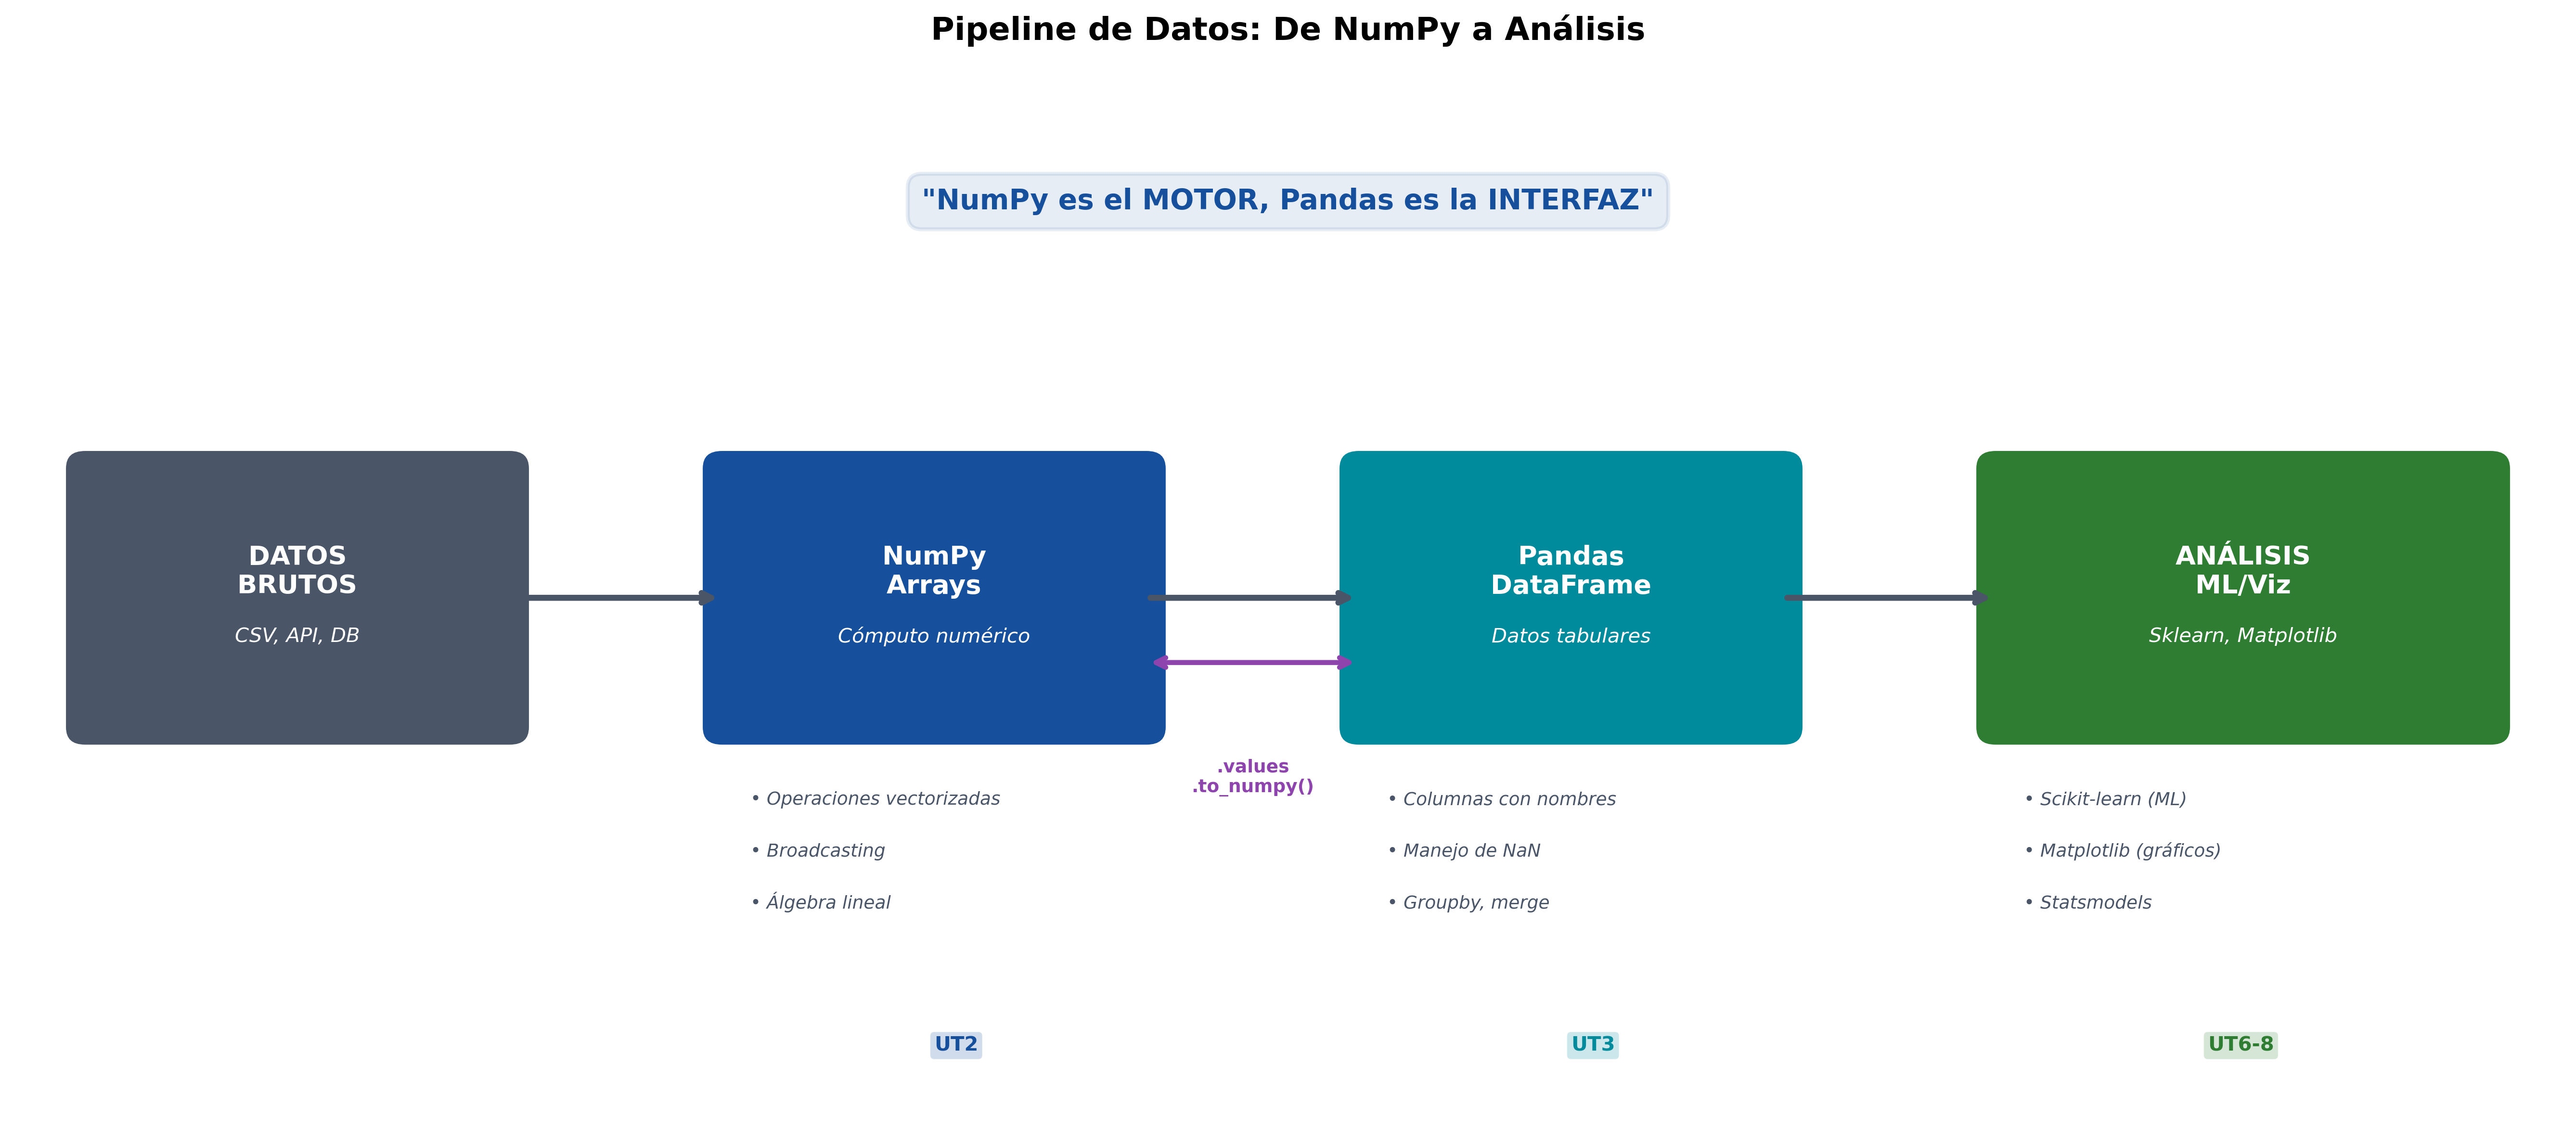
<figcaption aria-hidden="true">Pipeline de Datos: De NumPy a
Pandas</figcaption>
</figure>

Todo lo que has aprendido en esta UT se transfiere directamente a
Pandas:

-   `arr[arr > 5]` → `df[df['columna'] > 5]`
-   `np.mean(arr, axis=0)` → `df.mean(axis=0)`
-   `arr.reshape(10, 5)` → `df.pivot()`

## Ejemplos de referencia: domina la sintaxis

En esta sección se agrupan los ejemplos de código detallados que sirven
de base para los ejercicios prácticos de la unidad. Úsalos como consulta
cuando necesites verificar la sintaxis exacta.

### Medición de eficiencia en memoria

Este código demuestra cómo cuantificar el ahorro de espacio entre las
estructuras nativas de Python y los arrays de NumPy.

In [36]:
import sys
import numpy as np

# Memoria ocupada por una lista de Python
lista = list(range(1000000))
memoria_lista = sys.getsizeof(lista) + sum(sys.getsizeof(item) for item in lista)

# Memoria ocupada por un array de NumPy (int64 por defecto)
array = np.array(lista)
memoria_array = array.nbytes + sys.getsizeof(array)

print(f"Memoria lista Python: {memoria_lista / 1e6:.2f} MB")
print(f"Memoria array NumPy: {memoria_array / 1e6:.2f} MB")
print(f"Reducción: {(1 - memoria_array/memoria_lista)*100:.1f}%")

### Inspección de atributos y dimensiones

Comparativa visual de cómo NumPy interpreta las dimensiones en
diferentes tensores.

In [37]:
# Crear arrays de diferentes dimensiones
vector = np.array([1, 2, 3, 4, 5])
matriz = np.array([[1, 2, 3], [4, 5, 6]])
tensor = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])

# Inspección sistemática
for nombre, obj in zip(['VECTOR', 'MATRIZ', 'TENSOR'], [vector, matriz, tensor]):
    print(f"=== {nombre} ===")
    print(f"ndim:  {obj.ndim}")
    print(f"shape: {obj.shape}")
    print(f"size:  {obj.size}")
    print(f"dtype: {obj.dtype}\n")

### Técnicas avanzadas de indexación

Ejemplos de *fancy indexing* y selección condicional compleja.

In [38]:
# Fancy indexing en 1D
arr = np.array([10, 20, 30, 40, 50, 60, 70])
indices = [0, 2, 5]
print("Fancy indexing 1D:", arr[indices])

# Selección en 2D (filas específicas)
X = np.array([[1,2], [3,4], [5,6], [7,8], [9,10]])
filas_elegidas = np.array([0, 1, 3])
print("\nSelección de filas:\n", X[filas_elegidas])

# Máscaras booleanas combinadas
datos = np.array([5, 15, 25, 35, 45])
condicion = (datos > 10) & (datos < 40)
print("\nFiltrado booleano (10 < x < 40):", datos[condicion])

### Guía visual de *broadcasting*

Desglose de cómo NumPy “estira” virtualmente las dimensiones para operar
entre arrays de diferentes formas.

In [39]:
# Setup de matriz (2, 3)
matriz = np.array([[1, 2, 3], [4, 5, 6]])

# 1. Broadcast de vector fila (3,) -> se alinea con la última dimensión
v_fila = np.array([10, 20, 30])
print("Matriz + Fila:\n", matriz + v_fila)

# 2. Broadcast de vector columna (2, 1) -> se alinea con la primera dimensión
v_col = np.array([[100], [200]])
print("\nMatriz + Columna:\n", matriz + v_col)

# 3. Broadcast simultáneo (2, 1) + (1, 3) -> crea una matriz (2, 3)
fila = np.array([1, 2, 3])
col = np.array([[10], [20]])
print("\nBroadcast mutuo:\n", fila + col)

## Conceptos clave

-   **NumPy:** librería base para la computación científica en Python,
    optimizada para el manejo de grandes volúmenes de datos numéricos.
-   **Array (arreglo):** estructura de datos fundamental de NumPy que
    almacena elementos del mismo tipo de forma contigua en memoria.
-   **Vectorización:** técnica que permite aplicar operaciones sobre
    arrays completos sin usar bucles explícitos de Python.
-   ***Broadcasting***: mecanismo que permite realizar operaciones entre
    arrays de diferentes dimensiones bajo ciertas reglas de
    compatibilidad.
-   **Máscara booleana:** array de valores verdaderos/falsos utilizado
    para filtrar datos de forma eficiente.

### Checklist de autoevaluación

Antes de pasar a la práctica, asegúrate de que puedes:

-   [ ] Explicar por qué los arrays de NumPy son más eficientes que las
    listas de Python.
-   [ ] Predecir el resultado de una operación con “*broadcasting*”.
-   [ ] Aplicar máscaras booleanas para filtrar datos sin usar bucles.
-   [ ] Diferenciar entre una copia y una vista (*view*) de un array.

## Fuentes y lecturas recomendadas

**¿Quieres profundizar más?** Consulta la bibliografía detallada, los
enlaces a la documentación oficial y los recursos de aprendizaje para
esta unidad en el **Apéndice B: Fuentes y lecturas recomendadas** al
final de este libro.

¡Felicidades por llegar hasta aquí! Ahora dominas la base fundamental de
Data Science en Python. **NumPy se domina usándolo**, así que: ¡a
experimentar, romper cosas, y aprender de los errores!

::::